## This is based on the initial lecture + hcc sample data ##

This is related to Cedars-Sinai AI campus to do Cancer Prognosis Survival

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Imports are normally put in the first code cell of the notebook by convention

In [2]:
df = pd.read_csv("hcc_sample_data.csv")

#get rows and columns 
print(df.shape)

(165, 51)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   InstanceID                        165 non-null    int64  
 1   Gender                            165 non-null    int64  
 2   Symptoms                          147 non-null    float64
 3   Alcohol                           165 non-null    int64  
 4   Hepatitis B Surface Antigen       148 non-null    float64
 5   Hepatitis B e Antigen             126 non-null    float64
 6   Hepatitis B Core Antibody         141 non-null    float64
 7   Hepatitis C Virus Antibody        156 non-null    float64
 8   Cirrhosis                         165 non-null    int64  
 9   Endemic Countries                 126 non-null    float64
 10  Smoking                           124 non-null    float64
 11  Diabetes                          162 non-null    float64
 12  Obesity 

In [5]:
# Missing values 
print(df.isnull().sum())

InstanceID                           0
Gender                               0
Symptoms                            18
Alcohol                              0
Hepatitis B Surface Antigen         17
Hepatitis B e Antigen               39
Hepatitis B Core Antibody           24
Hepatitis C Virus Antibody           9
Cirrhosis                            0
Endemic Countries                   39
Smoking                             41
Diabetes                             3
Obesity                             10
Hemochromatosis                     23
Arterial Hypertension                3
Chronic Renal Insufficiency          2
Human Immunodeficiency Virus        14
Nonalcoholic Steatohepatitis        22
Esophageal Varices                  52
Splenomegaly                        15
Portal Hypertension                 11
Portal Vein Thrombosis               3
Liver Metastasis                     4
Radiological Hallmark                2
Age at diagnosis                     0
Grams of Alcohol per day 

In [ ]:
#Summary Statistics for a dataframe
print(df.describe())

       InstanceID      Gender   Symptoms      Alcohol  \
count  165.000000  165.000000  147.000000  165.000000   
mean    82.000000    0.806061    0.639456    0.739394   
std     47.775517    0.396586    0.481800    0.440302   
min      0.000000    0.000000    0.000000    0.000000   
25%     41.000000    1.000000    0.000000    0.000000   
50%     82.000000    1.000000    1.000000    1.000000   
75%    123.000000    1.000000    1.000000    1.000000   
max    164.000000    1.000000    1.000000    1.000000   

       Hepatitis B Surface Antigen  Hepatitis B e Antigen  \
count                   148.000000             126.000000   
mean                      0.108108               0.007937   
std                       0.311571               0.089087   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000  

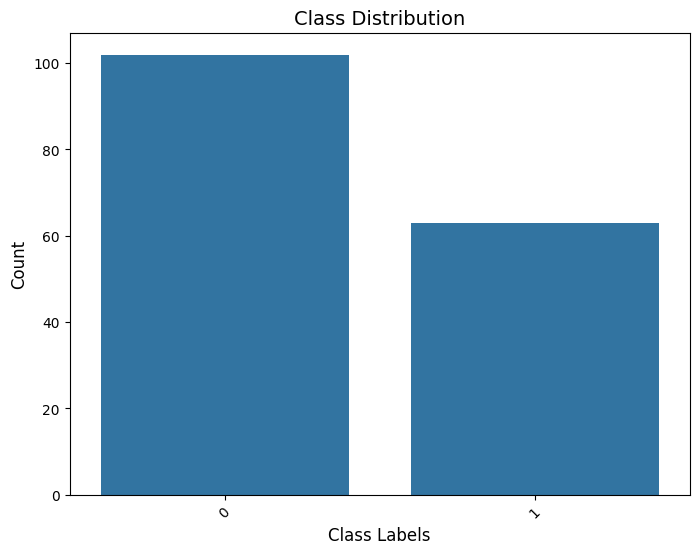

In [ ]:
# Define the column containing class labels (replace 'ClassColumn' with your actual column name)
class_column = "Class"  # Change this to match your dataset

# Count the occurrences of each class
class_counts = df[class_column].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

# Add labels and title
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Class Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed

# Show the plot
plt.show()

# Data Cleaning (of missing values) #

In [7]:
print("Number of rows in original dataset: "+ str(df.shape[0]))

Number of rows in original dataset: 165


In [ ]:
df_cleaned = df.dropna() # row with any missing values

In [10]:
num_rows_no_missing = df_cleaned.shape[0]
print(num_rows_no_missing)

8


In [11]:
# Imputing missing values
df_imputed = df.fillna(df.median())
new_total_missing = df_imputed.isnull().sum().sum()
print(new_total_missing)

0


***
### Unsupervised Learning - Principle Component Analysis & K-Means Clustering
Here we also see yet another way to import useful code, specifically, **StandardScalar**, **PCA**, and **KMeans**. 

e.g. **from sklearn.cluster:** This part tells Python to import from the cluster submodule of the sklearn (scikit-learn) library. The cluster submodule contains algorithms related to clustering (grouping data based on similarities).

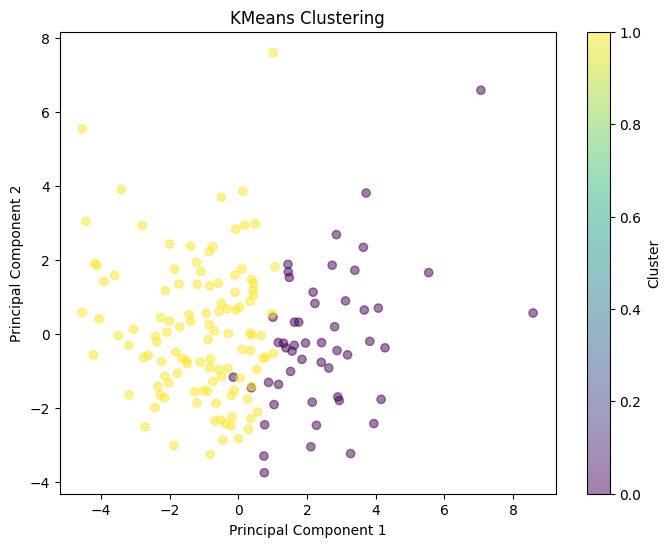

In [18]:
from sklearn.preprocessing import StandardScaler # Imports are normally put in the first code cell of the notebook by convention
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create a new DataFrame without the 'Class' column
df_x = df_imputed.drop(columns=[class_column])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

***
### Train and Evaluate Machine Learning Models (with 3-fold Cross Validation)
Below is a function to train and evaluate machine learning models when passed the following arguments:
* **local_df:** A target dataframe (with feature columns and an outcome column)
* **n_splits:** The number of cross validation (training and testing) data partitions
* **model:** A specific machine learning algorithm, e.g. decision tree, random forest, etc.

Once called, this function does the following:
* Separate the potentially predictive variables (i.e. features, 'X'), from the outcome (i.e. class, 'y')
* Initialize lists to store evaluation metrics for each CV partition
* Creation of training and testing data splits for each CV partition
* Fitting (i.e. training) the model on training data
* Applying the trained model to make predictions on testing data
* Calculating evaluation metrics for the model's predictive performace
* Ultimately averaging evaluation metrics across all CV partitions and reporting performance

Here we are using another important library, **sklearn** (otherwise known as scikit-learn) that includes many useful machine learning algorithms and related methods.
#### 1. Define Function 

In [19]:
from sklearn.model_selection import KFold # Imports are normally put in the first code cell of the notebook by convention
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

def train_model(local_df, n_splits, model):
    # Split data into features and target
    X = local_df.drop(columns=['Class'])
    y = local_df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)

    return [avg_accuracy, avg_balanced_accuracy, avg_precision, avg_recall, avg_f1]

Decision Tree Analysis

In [20]:
from sklearn.tree import DecisionTreeClassifier # Imports are normally put in the first code cell of the notebook by convention
# Train a decision tree model
n_splits=3
model = DecisionTreeClassifier() # Here we don't sepcify any hyperparameter values so algorithm defaults will be used
metric_list_1 = train_model(df_imputed, n_splits, model)

Average Accuracy: 0.6303030303030303
Average Balanced Accuracy: 0.6171744731991412
Average Precision: 0.6402925000998123
Average Recall: 0.6303030303030303
Average F1 Score: 0.6334217990842662


Random Forest Models

In [21]:
from sklearn.ensemble import RandomForestClassifier # Imports are normally put in the first code cell of the notebook by convention
# Train a decision tree model
n_splits=3
model = DecisionTreeClassifier() # Here we don't sepcify any hyperparameter values so algorithm defaults will be used
metric_list_2 = train_model(df_imputed, n_splits, model)

Average Accuracy: 0.6242424242424242
Average Balanced Accuracy: 0.6155771351454464
Average Precision: 0.64056397971813
Average Recall: 0.6242424242424242
Average F1 Score: 0.6281622448966326


#### Basic Average Metric Comparison Plot Between Algorithms

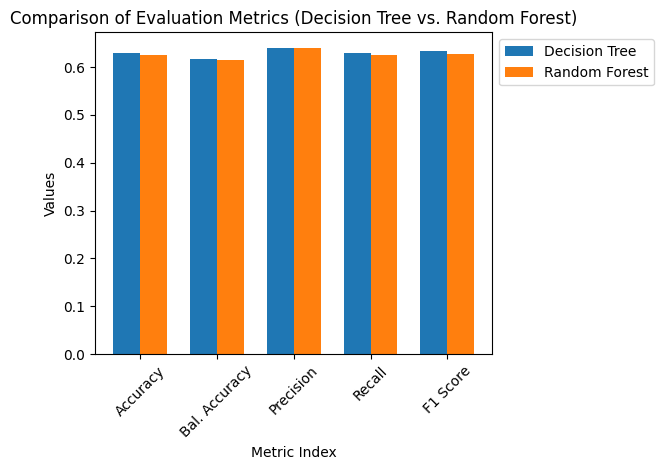

In [22]:
import matplotlib.pyplot as plt # Imports are normally put in the first code cell of the notebook by convention
import numpy as np

# Create a range of positions for the bars
x = np.arange(len(metric_list_1))

# Set the width of the bars
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()

# Plot the bars for both lists
bars1 = ax.bar(x - width/2, metric_list_1, width, label='Decision Tree')
bars2 = ax.bar(x + width/2, metric_list_2, width, label='Random Forest')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metric Index')
ax.set_ylabel('Values')
ax.set_title('Comparison of Evaluation Metrics (Decision Tree vs. Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'Bal. Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.xticks(rotation=45)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

### ROC plot for eval

c:\Python\BreastCancerPrognosis\AICampus\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


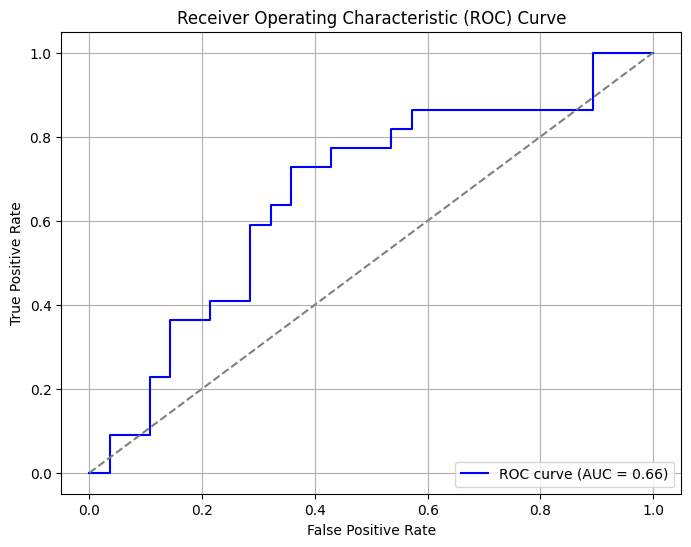

In [23]:
from sklearn.linear_model import LogisticRegression # Imports are normally put in the first code cell of the notebook by convention
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Split data into features and target
X = df_imputed.drop(columns=['Class'])
y = df_imputed['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a binary classifier (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities (not just the class labels)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

***
## Using ChatGPT to Help Write Python Code for Data Science
ChatGPT is an example of a large language model (LLM) that can be very useful for learning more about writing python code and directly generating example code for completing specific tasks. 

Below we give some examples of requests that might be provided to ChatGPT to get it to generate some useful python code. 
***
### Example: Applying Iterative Imputation for Missing Data Values
**ChatGPT Prompt:** Write me python code to apply iterative imputation to a dataframe to replace missing values.
***
### Example: Stratified Cross Validation
**ChatGPT Prompt:** Write me python code to apply stratified cross validation to a dataset balancing the 'Class' column as closely as possible across partitions. 
***
### Example: Hyperparameter Sweep
**ChatGPT Prompt:** Write me python code that completes a simple hyperparameter sweep for a decision tree algorithm
***
### Example: Boxplot Comparing Algorithm Performance
**ChatGPT Prompt:** Write me python code to generate a boxplot comparing the F1-scores across 10 CV partitions for two algorithms.
***
### Example: Estimating Model Feature Importance
**ChatGPT Prompt:** Write me python code to calculate model feature importance estimates following model training. 